# Cybersecurity Anomaly Detection
## K-Means Clustering Analysis

---

Notebook ini mengimplementasikan deteksi anomali keamanan siber menggunakan algoritma **K-Means Clustering**.

### Daftar Isi:
1. [Import Library](#1-import-library)
2. [Data Loading](#2-data-loading)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis)
4. [Preprocessing](#4-preprocessing)
5. [K-Means Clustering](#5-k-means-clustering)
6. [Cluster Evaluation](#6-cluster-evaluation)
7. [Visualization](#7-visualization)
8. [Cluster Interpretation](#8-cluster-interpretation)
9. [Save Model](#9-save-model)

---
## 1. Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

import joblib
import json
import os

# Matplotlib style
plt.style.use('dark_background')

# Neon colors for cybersecurity theme
NEON_GREEN = '#00ff88'
NEON_RED = '#ff4444'
COLORS = [NEON_GREEN, NEON_RED, '#ffaa00', '#00aaff', '#ff00ff']

print("Library berhasil diimport.")

Library berhasil diimport.


---
## 2. Data Loading

In [3]:
# Load dataset
df = pd.read_csv('dataset/cybersecurity_attacks.csv')

print(f"Dataset berhasil dimuat.")
print(f"Jumlah record : {df.shape[0]:,}")
print(f"Jumlah kolom  : {df.shape[1]}")

Dataset berhasil dimuat.
Jumlah record : 40,000
Jumlah kolom  : 25


In [4]:
# Preview data
df.head(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,...,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,Control,FTP,Veritatis nihil amet atque molestias aperiam m...,...,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Segment B,"Ambala, Tripura",NaN,Log Data,Alert Data,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Data,HTTP,Consequatur ipsum autem reprehenderit quae. Do...,...,Blocked,Medium,Mishti Chaudhuri,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,Segment A,"Rampur, Mizoram",87.128.245.244,NaN,NaN,Server


In [5]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

---
## 3. Exploratory Data Analysis

In [6]:
# Statistik deskriptif
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [7]:
# Cek missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_pct
})

missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage (%)
Malware Indicators,20000,50.00
Alerts/Warnings,20067,50.17
Proxy Information,19851,49.63
Firewall Logs,19961,49.90
IDS/IPS Alerts,20050,50.12


In [8]:
# Kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Kolom numerik ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"   {i}. {col}")

Kolom numerik (4):
   1. Source Port
   2. Destination Port
   3. Packet Length
   4. Anomaly Scores


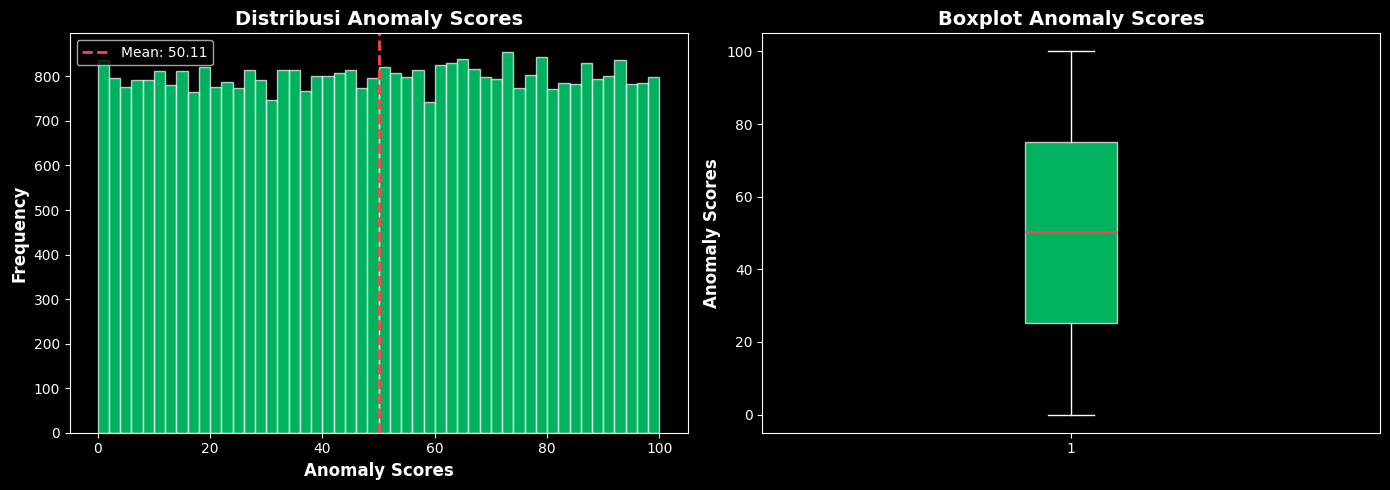

In [9]:
# Distribusi Anomaly Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Anomaly Scores'], bins=50, color=NEON_GREEN, alpha=0.7, edgecolor='white')
axes[0].set_xlabel('Anomaly Scores', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribusi Anomaly Scores', fontsize=14, fontweight='bold')
axes[0].axvline(df['Anomaly Scores'].mean(), color=NEON_RED, linestyle='--', linewidth=2, label=f'Mean: {df["Anomaly Scores"].mean():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['Anomaly Scores'].dropna(), patch_artist=True,
                boxprops=dict(facecolor=NEON_GREEN, alpha=0.7),
                medianprops=dict(color=NEON_RED, linewidth=2))
axes[1].set_ylabel('Anomaly Scores', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot Anomaly Scores', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
# Statistik Anomaly Scores
print("Statistik Anomaly Scores:")
print(f"   Mean   : {df['Anomaly Scores'].mean():.2f}")
print(f"   Std    : {df['Anomaly Scores'].std():.2f}")
print(f"   Min    : {df['Anomaly Scores'].min():.2f}")
print(f"   Max    : {df['Anomaly Scores'].max():.2f}")
print(f"   Median : {df['Anomaly Scores'].median():.2f}")

Statistik Anomaly Scores:
   Mean   : 50.11
   Std    : 28.85
   Min    : 0.00
   Max    : 100.00
   Median : 50.34


---
## 4. Preprocessing

In [11]:
# Feature selection - menggunakan Anomaly Scores
X = df[['Anomaly Scores']].copy()

# Handle missing values
X = X.fillna(X.median())

print(f"Feature yang digunakan: {X.columns.tolist()}")
print(f"Shape: {X.shape}")

Feature yang digunakan: ['Anomaly Scores']
Shape: (40000, 1)


In [12]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("StandardScaler diterapkan.")
print(f"Mean setelah scaling  : {X_scaled.mean():.6f}")
print(f"Std setelah scaling   : {X_scaled.std():.6f}")

StandardScaler diterapkan.
Mean setelah scaling  : 0.000000
Std setelah scaling   : 1.000000


---
## 5. K-Means Clustering

### 5.1 Elbow Method

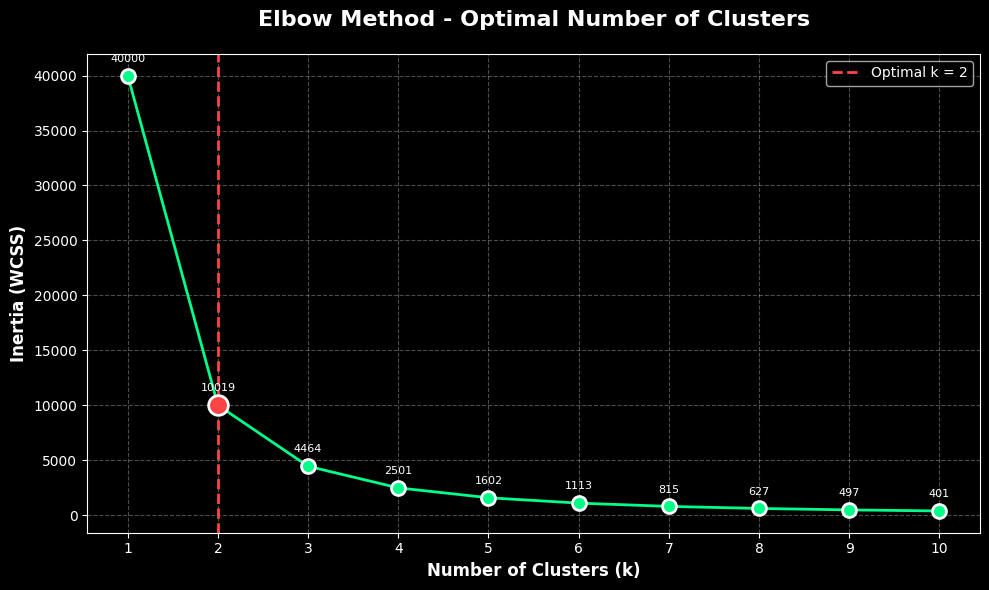

In [13]:
# Elbow Method
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(k_range, inertias, 'o-', color=NEON_GREEN, linewidth=2, markersize=10,
        markerfacecolor=NEON_GREEN, markeredgecolor='white', markeredgewidth=2)

# Highlight optimal k=2
OPTIMAL_K = 2
ax.axvline(x=OPTIMAL_K, color=NEON_RED, linestyle='--', linewidth=2, label=f'Optimal k = {OPTIMAL_K}')
ax.scatter([OPTIMAL_K], [inertias[OPTIMAL_K-1]], color=NEON_RED, s=200, zorder=5,
           edgecolors='white', linewidths=2)

# Add inertia values
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    ax.annotate(f'{inertia:.0f}', xy=(k, inertia), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=8, color='white')

ax.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax.set_ylabel('Inertia (WCSS)', fontsize=12, fontweight='bold')
ax.set_title('Elbow Method - Optimal Number of Clusters', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(list(k_range))
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### 5.2 Silhouette Analysis

In [14]:
# Silhouette Score Analysis
k_range_sil = range(2, 11)
sil_scores = []

print("Evaluasi nilai k:")
print("-" * 50)
print(f"{'k':<5} {'Silhouette':<15} {'Davies-Bouldin':<15}")
print("-" * 50)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    sil_scores.append(sil)
    
    marker = "[BEST]" if k == 2 else ""
    print(f"{k:<5} {sil:<15.4f} {db:<15.4f} {marker}")

print("-" * 50)

Evaluasi nilai k:
--------------------------------------------------
k     Silhouette      Davies-Bouldin 
--------------------------------------------------
2     0.6264          0.5007          [BEST]
3     0.5892          0.5017          
4     0.5723          0.4992          
5     0.5611          0.5001          
6     0.5535          0.5009          
7     0.5507          0.4987          
8     0.5438          0.5015          
9     0.5415          0.5007          
10    0.5401          0.5011          
--------------------------------------------------


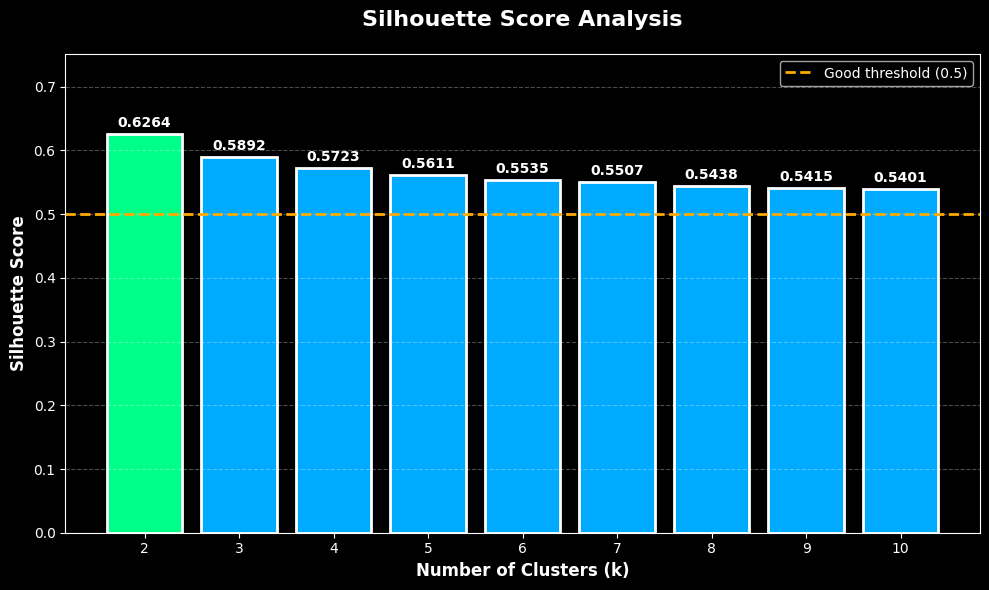

In [15]:
# Plot Silhouette Scores
fig, ax = plt.subplots(figsize=(10, 6))

max_sil = max(sil_scores)
bar_colors = [NEON_GREEN if s == max_sil else '#00aaff' for s in sil_scores]

bars = ax.bar(k_range_sil, sil_scores, color=bar_colors, edgecolor='white', linewidth=2)

# Add value labels on bars
for bar, score in zip(bars, sil_scores):
    height = bar.get_height()
    ax.annotate(f'{score:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', fontsize=10, fontweight='bold', color='white')

# Add reference line
ax.axhline(y=0.5, color='#ffaa00', linestyle='--', linewidth=2, label='Good threshold (0.5)')

ax.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax.set_title('Silhouette Score Analysis', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(list(k_range_sil))
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_ylim(0, max(sil_scores) * 1.2)

plt.tight_layout()
plt.show()

### 5.3 Training Model dengan k=2

In [16]:
# Train final model dengan k=2
OPTIMAL_K = 2

kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=20)
labels = kmeans.fit_predict(X_scaled)

# Tambahkan label cluster ke dataframe
df['Cluster'] = labels

print(f"K-Means model berhasil di-train dengan k={OPTIMAL_K}")

K-Means model berhasil di-train dengan k=2


---
## 6. Cluster Evaluation

In [17]:
# Hitung metrik evaluasi
silhouette = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print("Metrik Evaluasi Model:")
print("=" * 40)
print(f"   Silhouette Score     : {silhouette:.4f}")
print(f"   Davies-Bouldin Index : {db_score:.4f}")
print("=" * 40)
print("\nInterpretasi:")
print(f"   - Silhouette Score > 0.5 menunjukkan clustering yang baik")
print(f"   - Davies-Bouldin Index yang rendah menunjukkan cluster yang terpisah dengan baik")

Metrik Evaluasi Model:
   Silhouette Score     : 0.6264
   Davies-Bouldin Index : 0.5007

Interpretasi:
   - Silhouette Score > 0.5 menunjukkan clustering yang baik
   - Davies-Bouldin Index yang rendah menunjukkan cluster yang terpisah dengan baik


In [18]:
# Distribusi cluster
cluster_dist = df['Cluster'].value_counts().sort_index()

print("Distribusi Cluster:")
print("-" * 40)
for cluster, count in cluster_dist.items():
    pct = count / len(df) * 100
    print(f"   Cluster {cluster}: {count:,} records ({pct:.1f}%)")
print("-" * 40)
print(f"   Total   : {len(df):,} records")

Distribusi Cluster:
----------------------------------------
   Cluster 0: 20,200 records (50.5%)
   Cluster 1: 19,800 records (49.5%)
----------------------------------------
   Total   : 40,000 records


---
## 7. Visualization

### 7.1 Cluster Distribution

In [19]:
# Determine cluster labels based on anomaly scores
cluster_means = df.groupby('Cluster')['Anomaly Scores'].mean()
attack_cluster = cluster_means.idxmax()
normal_cluster = cluster_means.idxmin()

cluster_labels = {
    attack_cluster: 'Attack Traffic',
    normal_cluster: 'Normal Traffic'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

print(f"Cluster Identification:")
print(f"   - Cluster {normal_cluster}: Normal Traffic (Avg Score: {cluster_means[normal_cluster]:.2f})")
print(f"   - Cluster {attack_cluster}: Attack Traffic (Avg Score: {cluster_means[attack_cluster]:.2f})")

Cluster Identification:
   - Cluster 1: Normal Traffic (Avg Score: 24.88)
   - Cluster 0: Attack Traffic (Avg Score: 74.84)


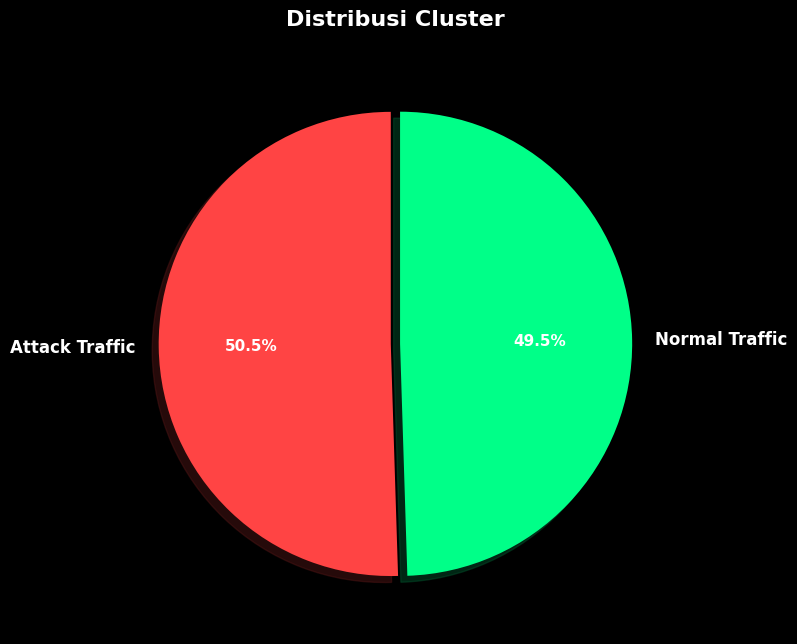

In [20]:
# Pie Chart - Cluster Distribution
fig, ax = plt.subplots(figsize=(8, 8))

cluster_counts = df['Cluster_Label'].value_counts()
colors = [NEON_GREEN if 'Normal' in label else NEON_RED for label in cluster_counts.index]

explode = [0.02] * len(cluster_counts)

wedges, texts, autotexts = ax.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=90
)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax.set_title('Distribusi Cluster', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

### 7.2 Scatter Plot dengan Centroids

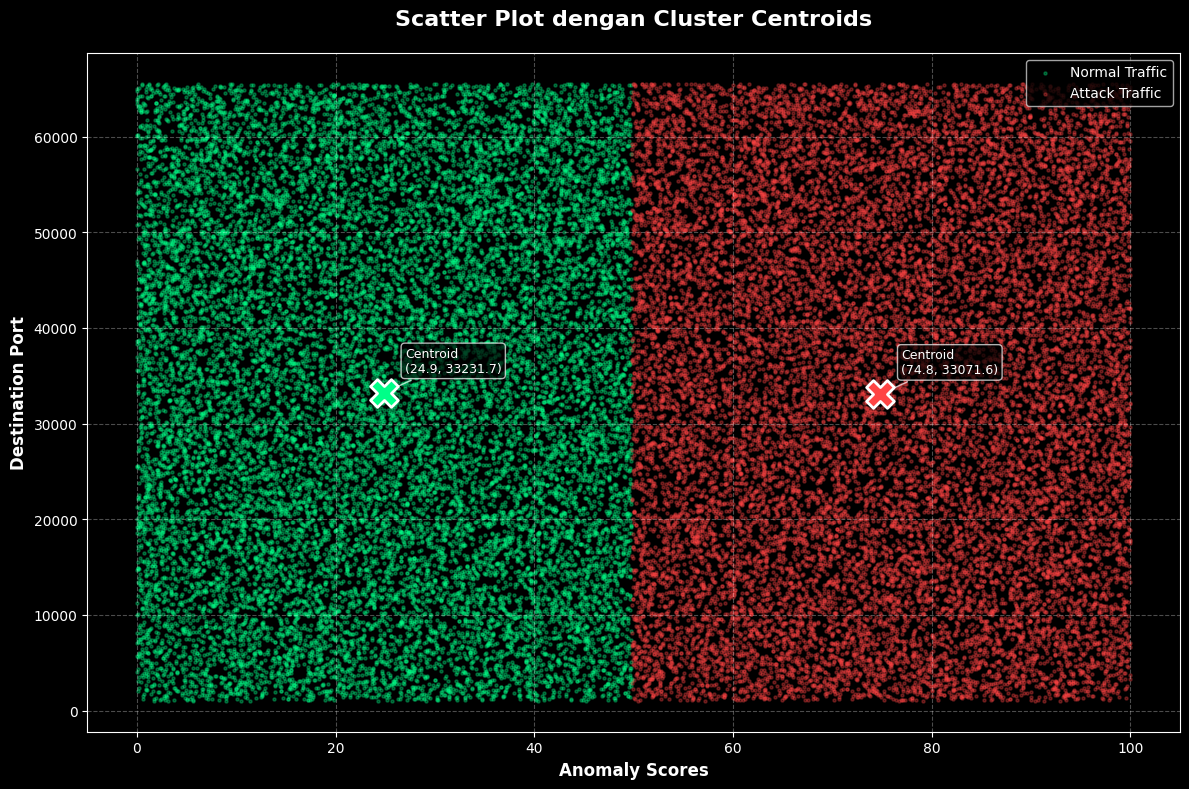

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

# Find a second numeric feature with high variance
numeric_features = [col for col in df.select_dtypes(include=[np.number]).columns if col not in ['Anomaly Scores', 'Cluster']]

if len(numeric_features) > 0:
    variances = {col: df[col].var() for col in numeric_features}
    y_feature = max(variances, key=variances.get)
    y_data = df[y_feature].values
    y_label = y_feature
else:
    y_data = np.arange(len(df)) + np.random.normal(0, 0.1, len(df))
    y_label = 'Record Index'

# Plot scatter for each cluster
for cluster in [normal_cluster, attack_cluster]:
    mask = df['Cluster'] == cluster
    color = NEON_GREEN if cluster == normal_cluster else NEON_RED
    label = cluster_labels[cluster]
    ax.scatter(df.loc[mask, 'Anomaly Scores'], y_data[mask],
               c=color, alpha=0.3, s=5, label=label)

# Calculate and plot centroids
for cluster in [normal_cluster, attack_cluster]:
    mask = df['Cluster'] == cluster
    cx = df.loc[mask, 'Anomaly Scores'].mean()
    cy = y_data[mask].mean()
    color = NEON_GREEN if cluster == normal_cluster else NEON_RED
    ax.scatter(cx, cy, c=color, marker='X', s=400, edgecolors='white',
               linewidths=2, zorder=5)
    ax.annotate(f'Centroid\n({cx:.1f}, {cy:.1f})',
                xy=(cx, cy), xytext=(15, 15), textcoords='offset points',
                fontsize=9, color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='white', alpha=0.7))

ax.set_xlabel('Anomaly Scores', fontsize=12, fontweight='bold')
ax.set_ylabel(y_label, fontsize=12, fontweight='bold')
ax.set_title('Scatter Plot dengan Cluster Centroids', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### 7.3 PCA Visualization

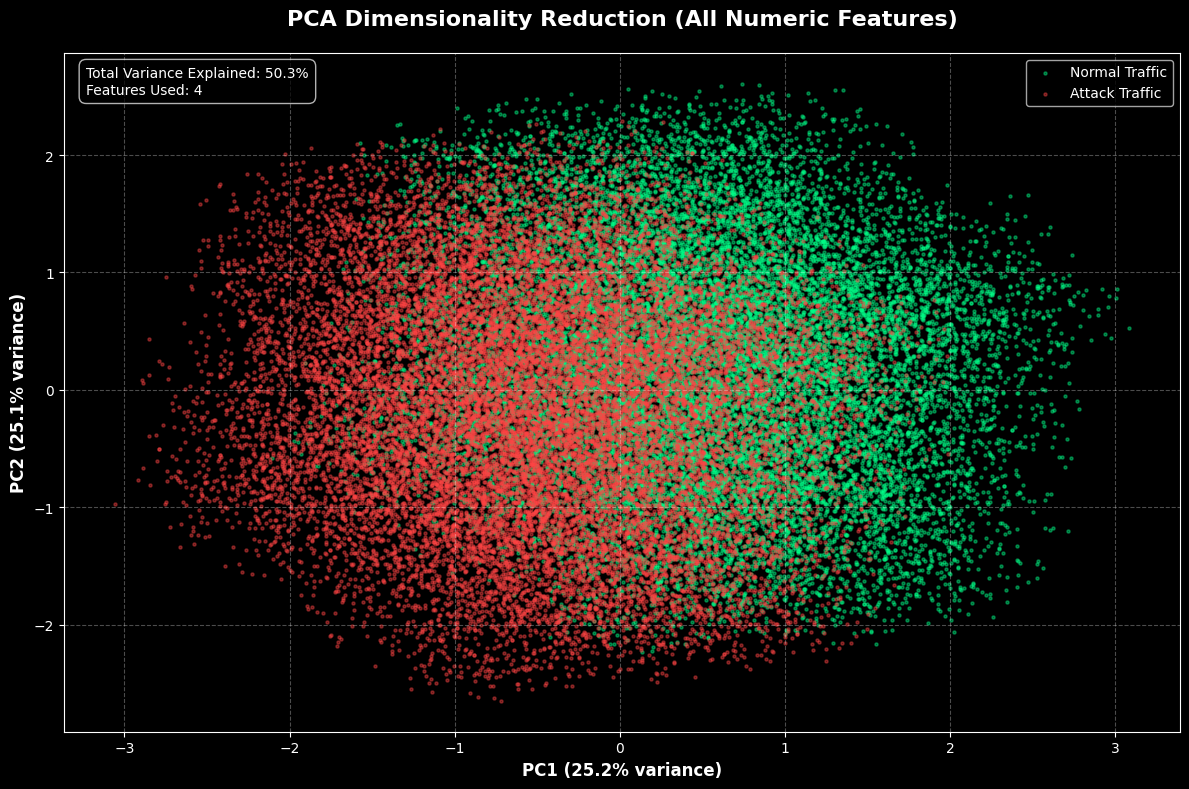

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

# Use all numeric features for PCA (excluding Cluster)
numeric_cols_pca = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Cluster']
X_all_numeric = df[numeric_cols_pca].fillna(df[numeric_cols_pca].median()).values

# Standardize before PCA
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_all_numeric)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_scaled)

# Plot PCA results
for cluster in [normal_cluster, attack_cluster]:
    mask = df['Cluster'] == cluster
    color = NEON_GREEN if cluster == normal_cluster else NEON_RED
    label = cluster_labels[cluster]
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1],
               c=color, alpha=0.4, s=5, label=label)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)',
              fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)',
              fontsize=12, fontweight='bold')
ax.set_title('PCA Dimensionality Reduction (All Numeric Features)',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

# Add variance info box
total_var = (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100
textstr = f'Total Variance Explained: {total_var:.1f}%\nFeatures Used: {len(numeric_cols_pca)}'
props = dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.7, edgecolor='white')
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, color='white')

plt.tight_layout()
plt.show()

### 7.4 Radar Chart (Cluster Profile)

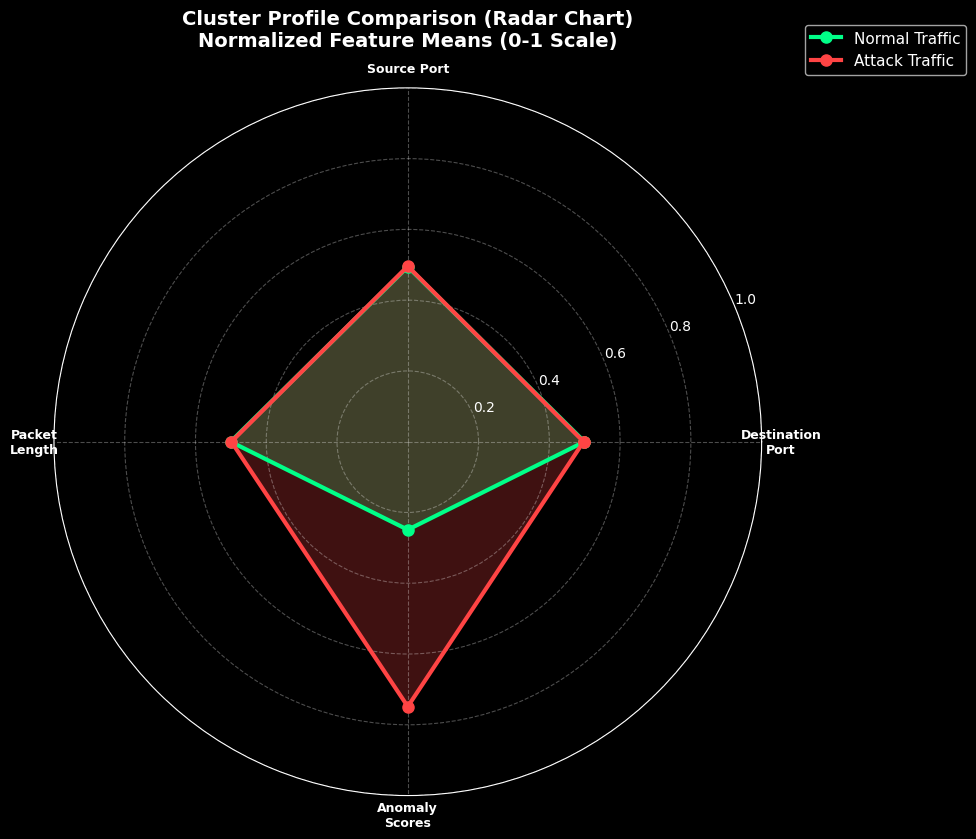

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Select top numeric features (max 8 for readability)
radar_features = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Cluster']
feature_variances = {col: df[col].var() for col in radar_features}
top_features = sorted(feature_variances.keys(), key=lambda x: feature_variances[x], reverse=True)[:8]

# Normalize using MinMaxScaler
df_normalized = df.copy()
minmax_scaler = MinMaxScaler()
df_normalized[top_features] = minmax_scaler.fit_transform(df[top_features].fillna(df[top_features].median()))

# Calculate means per cluster
cluster_means_normalized = df_normalized.groupby('Cluster')[top_features].mean()

# Prepare radar chart
categories = top_features
N = len(categories)

# Compute angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Plot for each cluster
for cluster in [normal_cluster, attack_cluster]:
    values = cluster_means_normalized.loc[cluster].values.tolist()
    values += values[:1]  # Complete the loop
    
    color = NEON_GREEN if cluster == normal_cluster else NEON_RED
    label = cluster_labels[cluster]
    
    ax.plot(angles, values, 'o-', linewidth=3, color=color, label=label, markersize=8)
    ax.fill(angles, values, alpha=0.25, color=color)

# Set labels
ax.set_xticks(angles[:-1])
feature_labels = [f.replace(' ', '\n').replace('_', '\n') if len(f) > 12 else f for f in categories]
ax.set_xticklabels(feature_labels, fontsize=9, fontweight='bold')

ax.set_title('Cluster Profile Comparison (Radar Chart)\nNormalized Feature Means (0-1 Scale)',
             fontsize=14, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

# Customize grid
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.yaxis.grid(True, color='white', alpha=0.3, linestyle='--')
ax.xaxis.grid(True, color='white', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

---
## 8. Cluster Interpretation

In [24]:
# Statistik per cluster
cluster_stats = df.groupby('Cluster')['Anomaly Scores'].agg(['mean', 'std', 'min', 'max', 'count'])
cluster_stats.columns = ['Mean', 'Std', 'Min', 'Max', 'Count']
cluster_stats = cluster_stats.round(2)

print("Statistik Cluster (Anomaly Scores):")
print(cluster_stats)

Statistik Cluster (Anomaly Scores):
          Mean    Std    Min     Max  Count
Cluster                                    
0        74.84  14.46  49.82  100.00  20200
1        24.88  14.42   0.00   49.81  19800


In [25]:
# Interpretasi cluster
cluster_interpretation = {}

for cluster in range(OPTIMAL_K):
    avg_score = df[df['Cluster'] == cluster]['Anomaly Scores'].mean()
    
    if avg_score >= 50:
        interpretation = {
            'risk_level': 'HIGH',
            'label': 'High Risk Traffic',
            'description': 'High anomaly scores - potential attack or suspicious activity',
            'color': '#ff4444'
        }
    else:
        interpretation = {
            'risk_level': 'LOW',
            'label': 'Normal Traffic',
            'description': 'Low anomaly scores - normal network traffic pattern',
            'color': '#00ff88'
        }
    
    interpretation['avg_anomaly_score'] = float(avg_score)
    cluster_interpretation[cluster] = interpretation
    
    print(f"\nCluster {cluster}:")
    print(f"   - Avg Anomaly Score : {avg_score:.2f}")
    print(f"   - Risk Level        : {interpretation['risk_level']}")
    print(f"   - Label             : {interpretation['label']}")
    print(f"   - Description       : {interpretation['description']}")


Cluster 0:
   - Avg Anomaly Score : 74.84
   - Risk Level        : HIGH
   - Label             : High Risk Traffic
   - Description       : High anomaly scores - potential attack or suspicious activity

Cluster 1:
   - Avg Anomaly Score : 24.88
   - Risk Level        : LOW
   - Label             : Normal Traffic
   - Description       : Low anomaly scores - normal network traffic pattern


---
## 9. Save Model

In [26]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Save scaler
joblib.dump(scaler, 'models/scaler.pkl')
print("Saved: models/scaler.pkl")

# Save K-Means model
joblib.dump(kmeans, 'models/kmeans_model.pkl')
print("Saved: models/kmeans_model.pkl")

# Save cluster interpretation
with open('models/cluster_interpretation.json', 'w') as f:
    json.dump(cluster_interpretation, f, indent=2)
print("Saved: models/cluster_interpretation.json")

# Save feature info
feature_info = {
    'features': ['Anomaly Scores'],
    'optimal_k': OPTIMAL_K,
    'silhouette_score': float(silhouette),
    'davies_bouldin_score': float(db_score),
    'model_type': 'KMeans',
    'scaler': 'StandardScaler'
}

with open('models/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)
print("Saved: models/feature_info.json")

Saved: models/scaler.pkl
Saved: models/kmeans_model.pkl
Saved: models/cluster_interpretation.json
Saved: models/feature_info.json


---
## Summary

In [27]:
print("="*70)
print(" MODEL SUMMARY")
print("="*70)

print(f"""
KONFIGURASI MODEL:
   - Algorithm  : K-Means Clustering
   - Clusters   : {OPTIMAL_K}
   - Features   : Anomaly Scores
   - Scaler     : StandardScaler

METRIK KUALITAS:
   - Silhouette Score     : {silhouette:.4f}
   - Davies-Bouldin Index : {db_score:.4f}

DISTRIBUSI CLUSTER:
   - Normal Traffic : {(df['Cluster'] == normal_cluster).sum():,} records ({(df['Cluster'] == normal_cluster).sum() / len(df) * 100:.1f}%)
   - Attack Traffic : {(df['Cluster'] == attack_cluster).sum():,} records ({(df['Cluster'] == attack_cluster).sum() / len(df) * 100:.1f}%)

FILE TERSIMPAN:
   - models/scaler.pkl
   - models/kmeans_model.pkl
   - models/cluster_interpretation.json
   - models/feature_info.json

TRAINING COMPLETE.
""")
print("="*70)

 MODEL SUMMARY

KONFIGURASI MODEL:
   - Algorithm  : K-Means Clustering
   - Clusters   : 2
   - Features   : Anomaly Scores
   - Scaler     : StandardScaler

METRIK KUALITAS:
   - Silhouette Score     : 0.6264
   - Davies-Bouldin Index : 0.5007

DISTRIBUSI CLUSTER:
   - Normal Traffic : 19,800 records (49.5%)
   - Attack Traffic : 20,200 records (50.5%)

FILE TERSIMPAN:
   - models/scaler.pkl
   - models/kmeans_model.pkl
   - models/cluster_interpretation.json
   - models/feature_info.json

TRAINING COMPLETE.

